# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('../data/liquor_store_sales.csv')
df.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

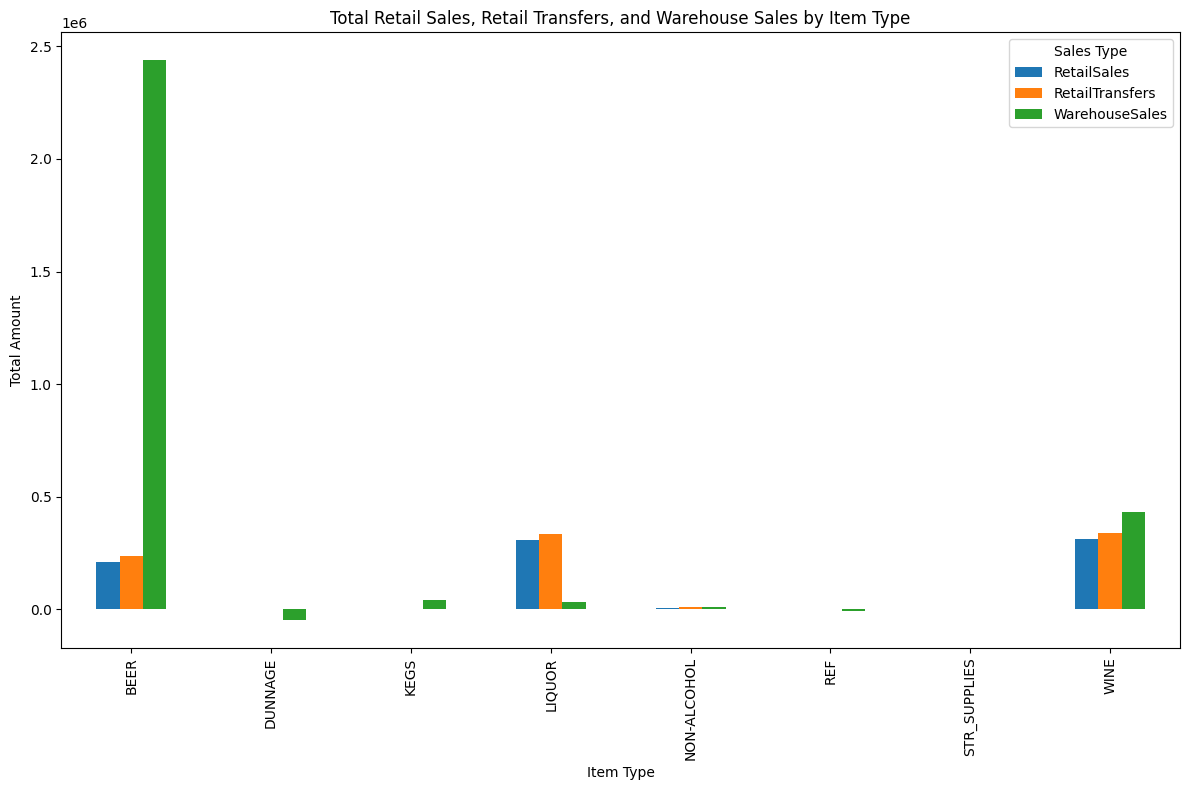

In [4]:
grouped_data = df.groupby("ItemType")[["RetailSales", "RetailTransfers", "WarehouseSales"]].sum()

# Create the grouped bar chart
grouped_data.plot(kind="bar", figsize=(12, 8))

plt.title("Total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Amount")
plt.legend(title="Sales Type")
plt.tight_layout()
plt.show()


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

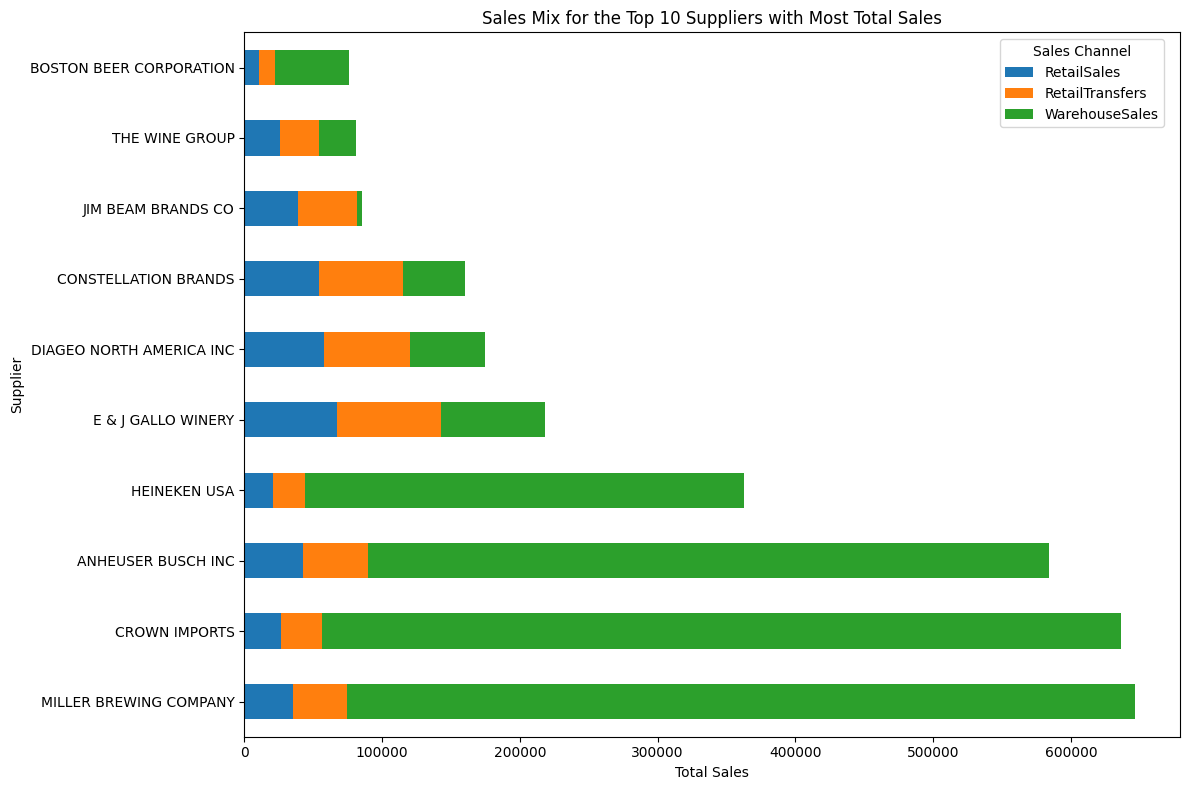

In [5]:
df['TotalSales'] = df['RetailSales'] + df['RetailTransfers'] + df['WarehouseSales']

# Group the data by 'Supplier' and sum the sales columns
supplier_sales = df.groupby('Supplier')[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'TotalSales']].sum()

# Sort suppliers by total sales in descending order and take the top 10
top10_suppliers = supplier_sales.sort_values('TotalSales', ascending=False).head(10)

# Step 2: Create a horizontal stacked bar chart for sales mix by supplier
ax = top10_suppliers[['RetailSales', 'RetailTransfers', 'WarehouseSales']].plot(
    kind='barh', stacked=True, figsize=(12, 8)
)

# Formatting the plot
plt.xlabel('Total Sales')
plt.ylabel('Supplier')
plt.title('Sales Mix for the Top 10 Suppliers with Most Total Sales')
plt.legend(title='Sales Channel', bbox_to_anchor=(.8, 1), loc='upper left')
plt.tight_layout()

plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

0    2017-04-01
1    2017-04-01
2    2017-04-01
3    2017-04-01
4    2017-04-01
Name: Date, dtype: object


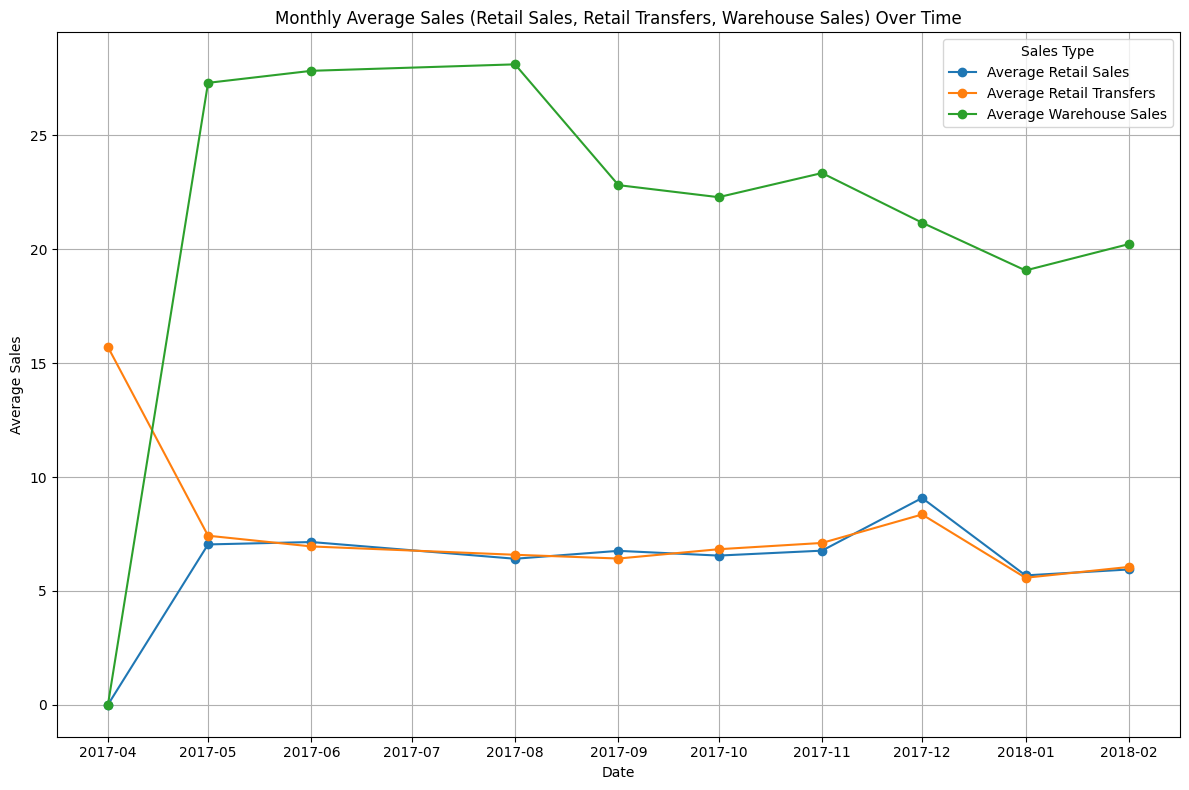

In [6]:
#df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day = 1)).dt.date
print(df['Date'].head())


# Step 2: Group the data by the Date and calculate monthly averages for the sales columns
monthly_avg = df.groupby('Date')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].mean().reset_index()

# Step 3: Create the multi-line chart
plt.figure(figsize=(12, 8))
plt.plot(monthly_avg['Date'], monthly_avg['RetailSales'], label='Average Retail Sales', marker='o')
plt.plot(monthly_avg['Date'], monthly_avg['RetailTransfers'], label='Average Retail Transfers', marker='o')
plt.plot(monthly_avg['Date'], monthly_avg['WarehouseSales'], label='Average Warehouse Sales', marker='o')

# Setting plot labels and title
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.title('Monthly Average Sales (Retail Sales, Retail Transfers, Warehouse Sales) Over Time')
plt.legend(title='Sales Type')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Plot the same information as above but as a bar chart.

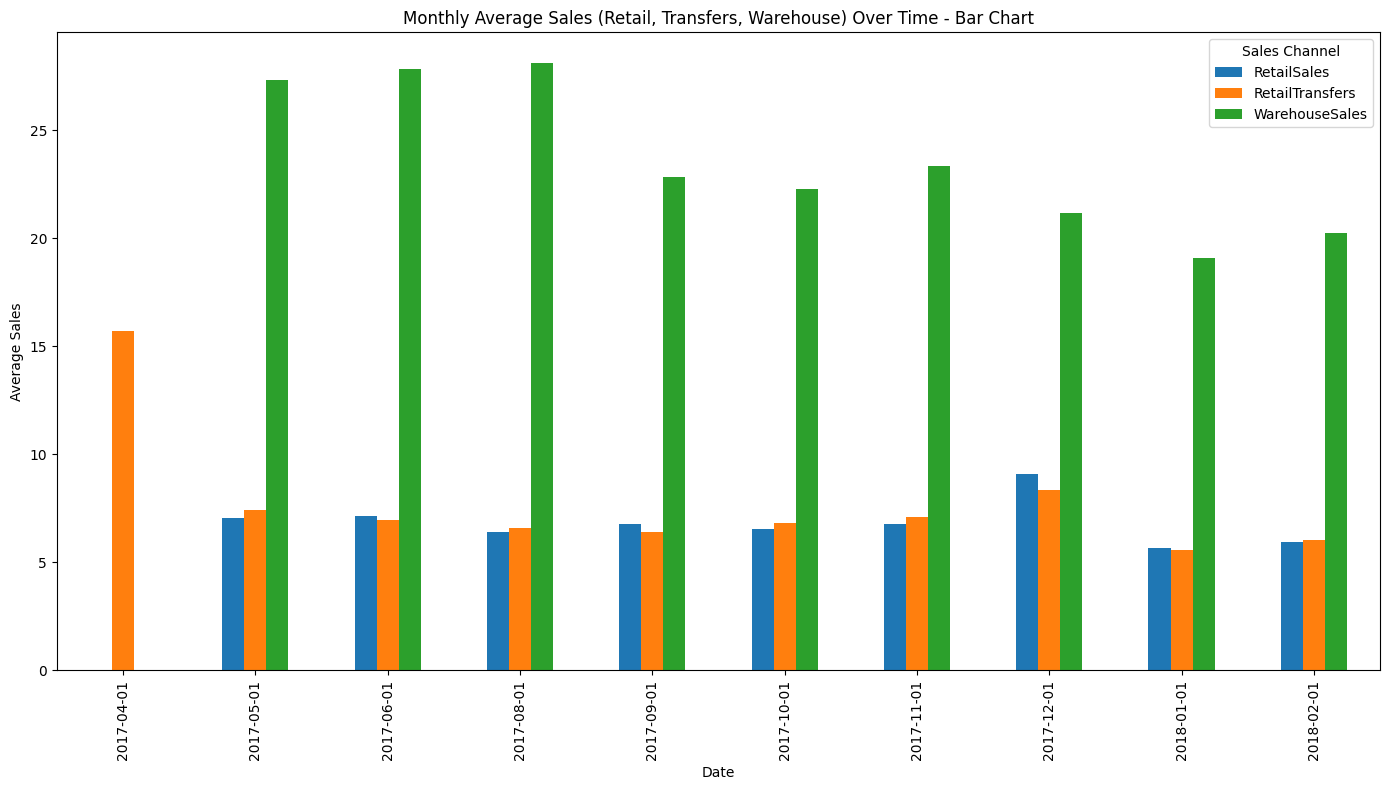

In [7]:
monthly_avg.set_index('Date', inplace=True) 
# Plot the grouped bar chart
ax = monthly_avg.plot(kind='bar', figsize=(14, 8)) 
plt.xlabel('Date') 
plt.ylabel('Average Sales') 
plt.title('Monthly Average Sales (Retail, Transfers, Warehouse) Over Time - Bar Chart') 
plt.legend(title='Sales Channel') 
plt.tight_layout() 
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

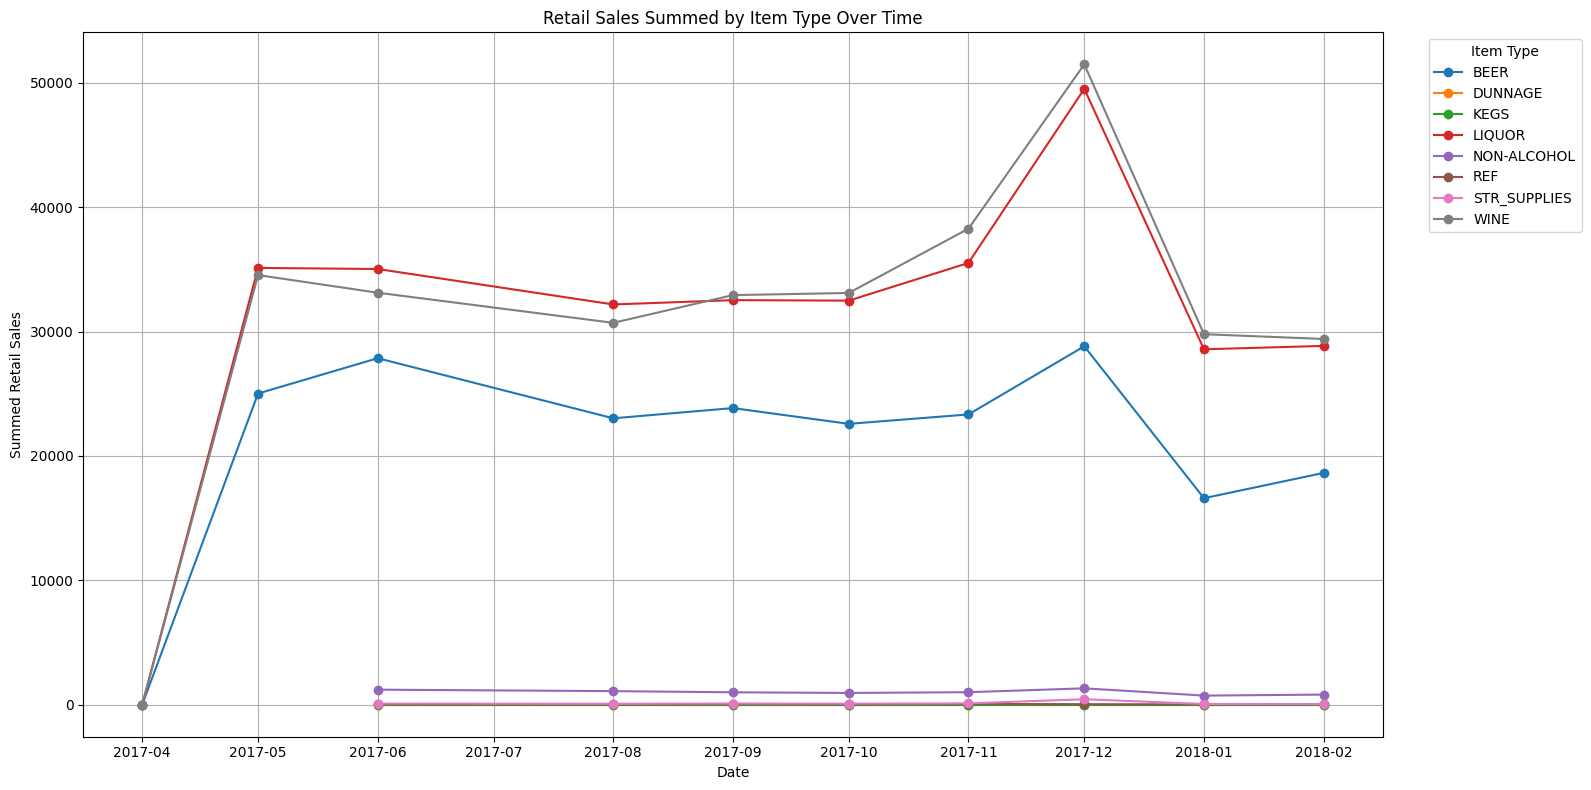

In [8]:
sales_by_item = df.groupby(['Date', 'ItemType'])['RetailSales'].sum().reset_index()

sales_pivot = sales_by_item.pivot(index='Date', columns='ItemType', values='RetailSales')

sales_pivot.plot(marker='o', figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Summed Retail Sales')
plt.title('Retail Sales Summed by Item Type Over Time')
plt.legend(title='Item Type', loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Plot the same information as above but as a bar chart.

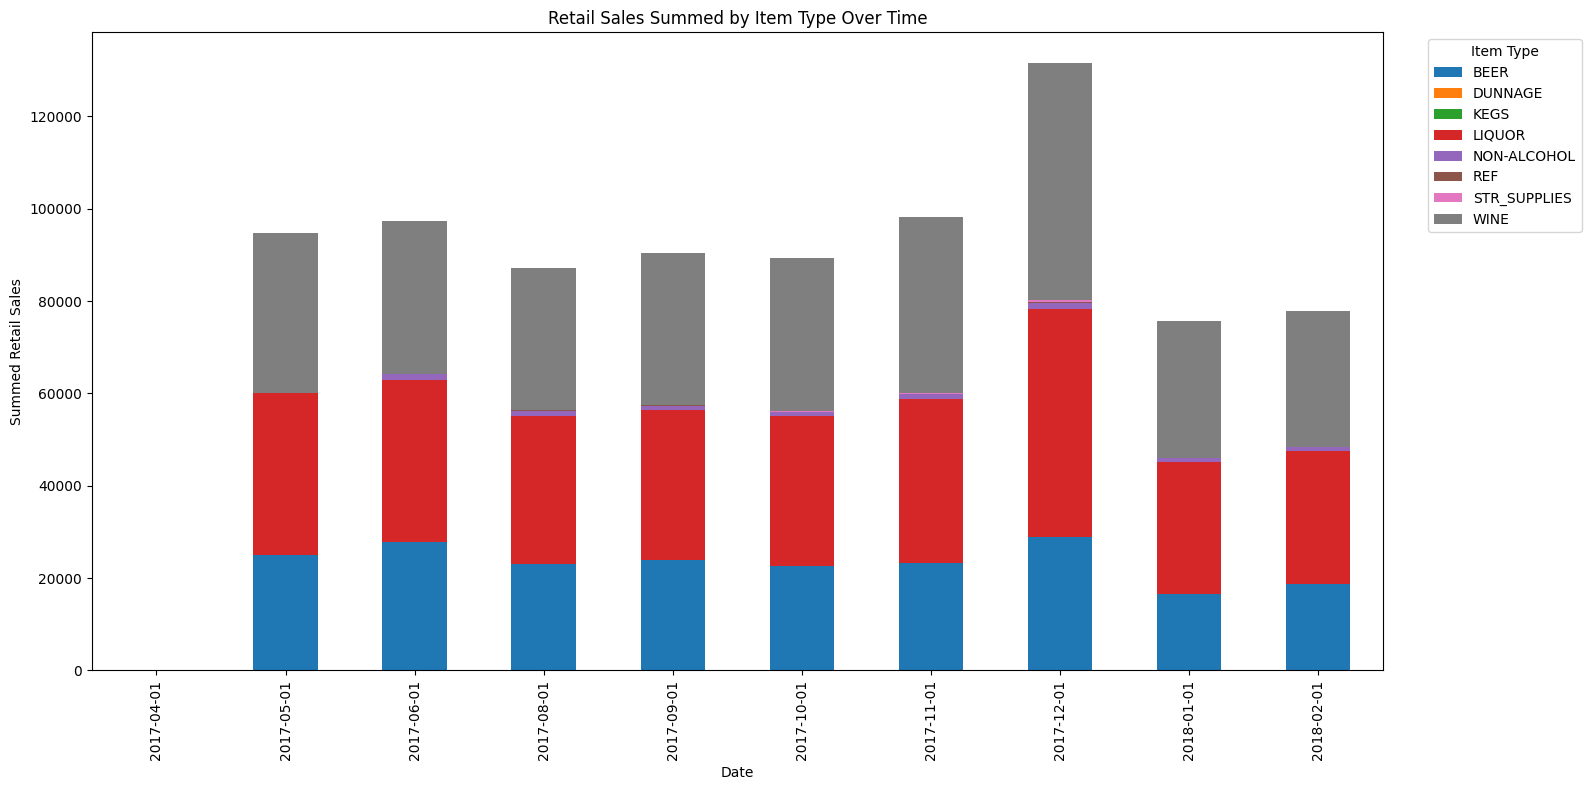

In [9]:
sales_pivot.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Summed Retail Sales')
plt.title('Retail Sales Summed by Item Type Over Time')
plt.legend(title='Item Type', loc='upper left', bbox_to_anchor=(1.03, 1))
plt.tight_layout()
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

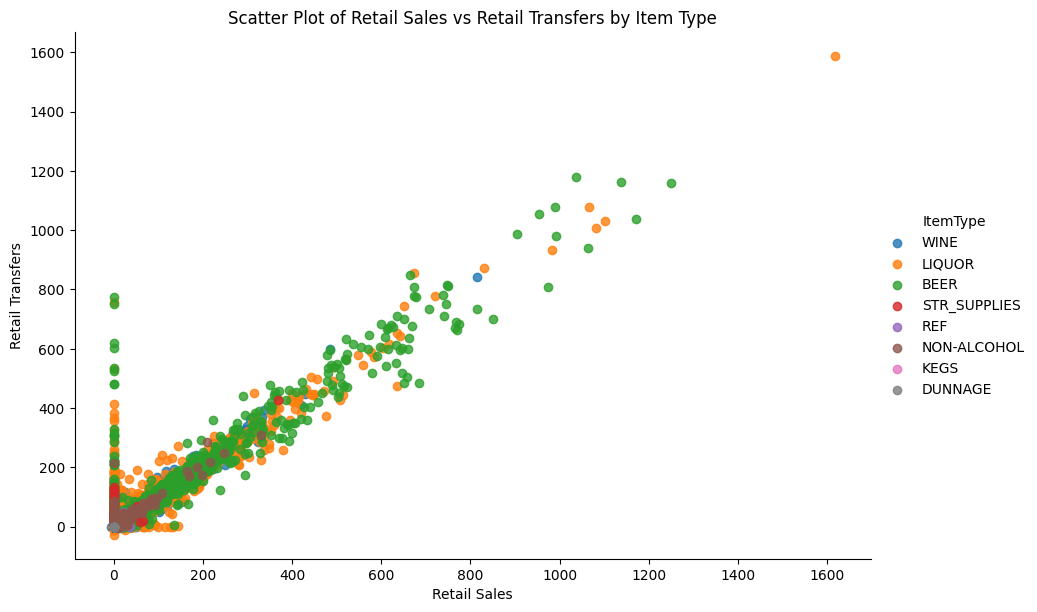

In [10]:
sns.lmplot(
    data=df,
    x="RetailSales",
    y="RetailTransfers",
    hue="ItemType",   #
    fit_reg=False,    
    aspect=1.5,      
    height=6          
)

# Set plot labels and title
plt.xlabel("Retail Sales")
plt.ylabel("Retail Transfers")
plt.title("Scatter Plot of Retail Sales vs Retail Transfers by Item Type")

plt.show()


## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

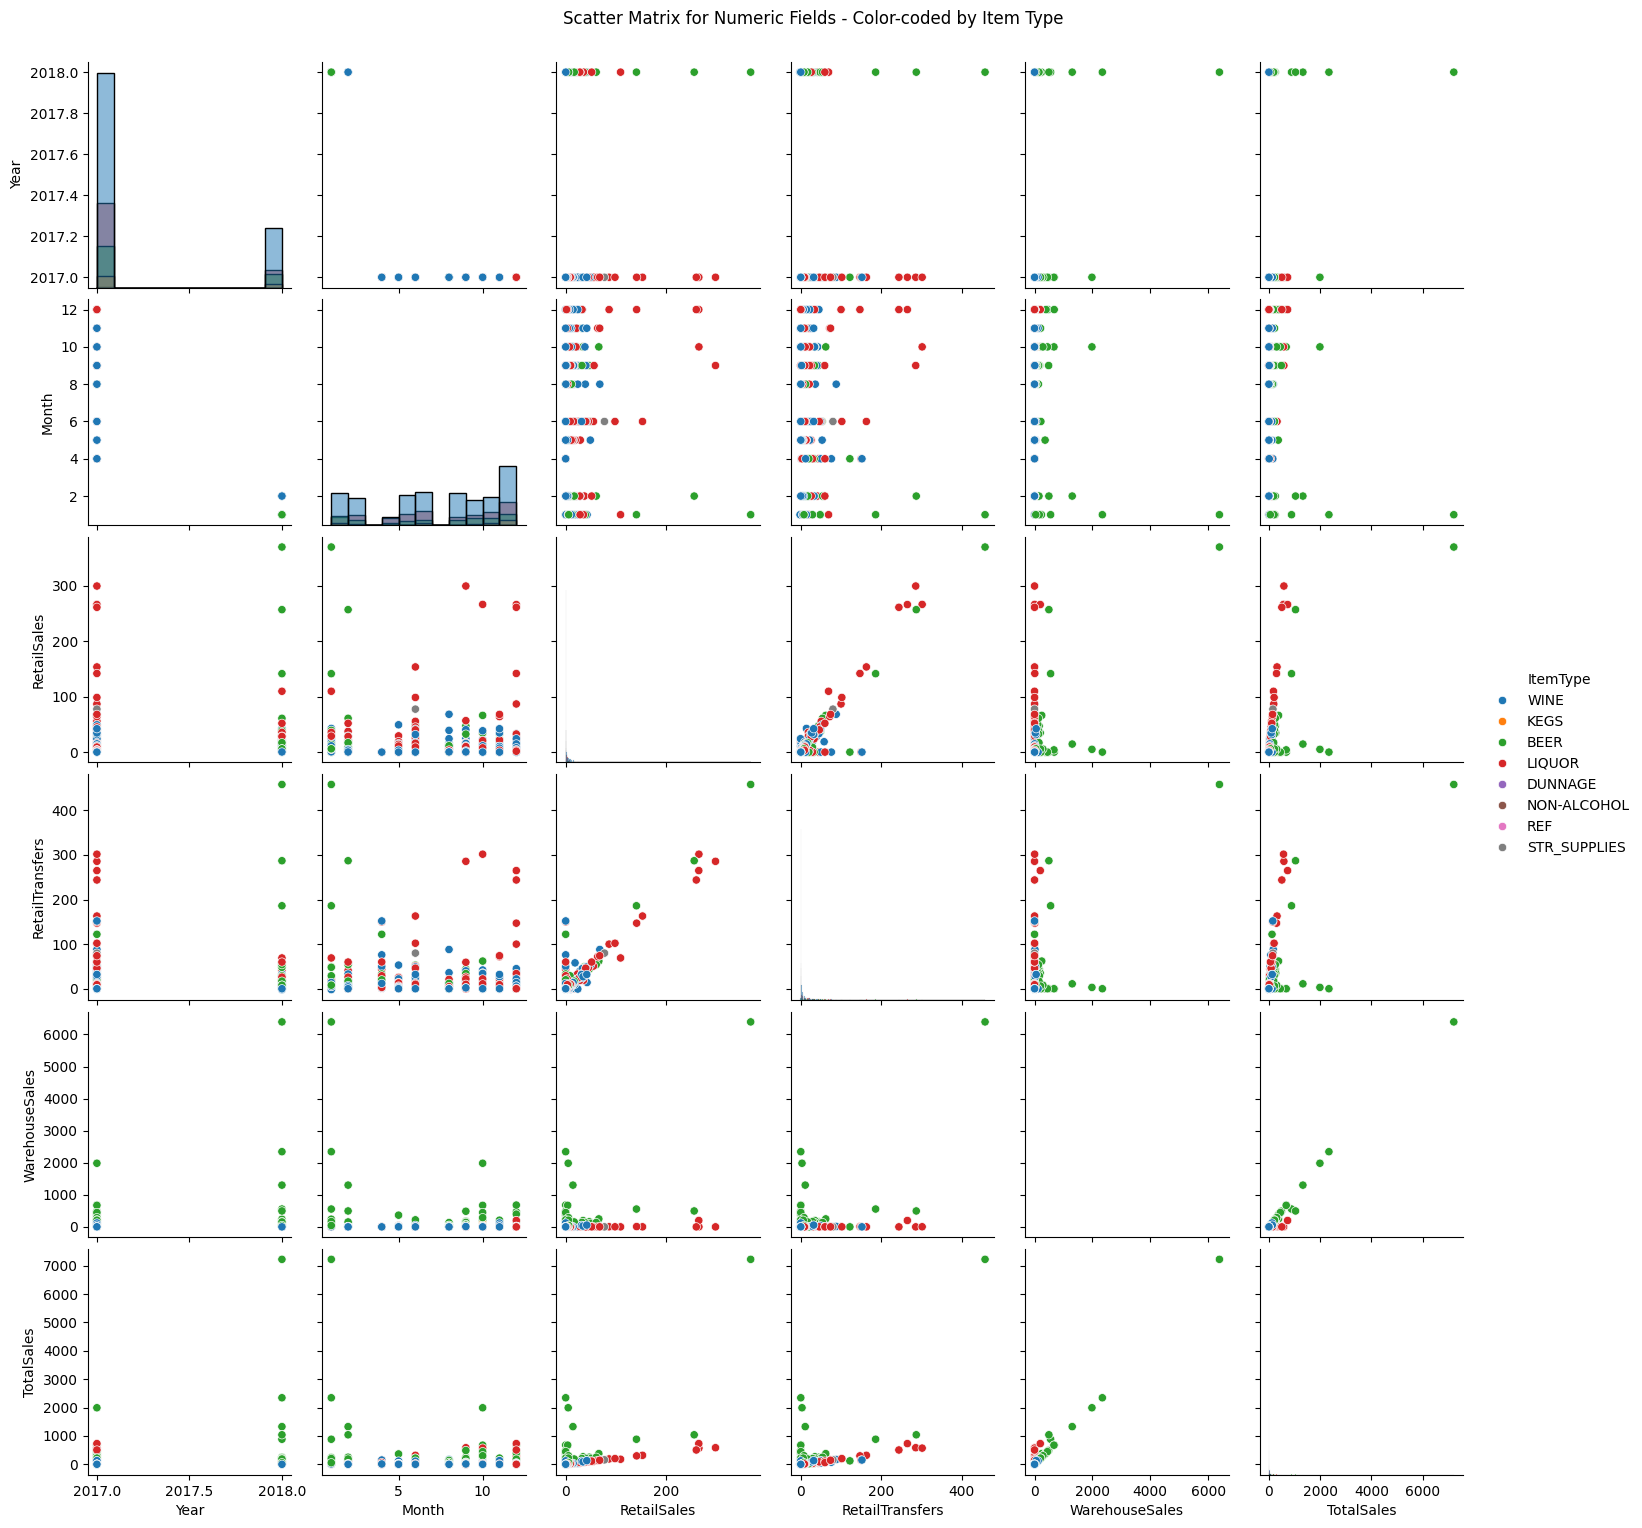

In [11]:
sample_df = df.sample(1000) 
numeric_cols = sample_df.select_dtypes(include=["number"]).columns
g = sns.pairplot(sample_df, vars=numeric_cols, hue="ItemType", diag_kind="hist")
g.fig.suptitle("Scatter Matrix for Numeric Fields - Color-coded by Item Type", y=1.02)
plt.show()
